# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Model Exploration\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

## HA data

# Combine different results

In [3]:

Add_on_path_list = ["GA\\","HA\\"]
Array = np.empty( (1, 1, 88, 5, 2,len(Add_on_path_list) ) )
for p,paths in enumerate(Add_on_path_list):

    df_Exp_profit = json_to_df(current_directory + Add_on_path + paths +  'Exp_profit.json')
    df_RT_profit  = json_to_df(current_directory + Add_on_path + paths + 'RT_profit.json')
    #print(df_Exp_profit)
    # Setup the arrays
    


    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        
        # Assign the month, the day, the model, and each of the 

        # Extract the 'm', 'd', and 't' values from column name
        parts = col.split('_')

        m = 0
        
        f = 1
        
        d = int(parts[2][3:])



        Array[(f-1),(m),(d-1),0,0,p] = df_Exp_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,0,p] = df_Exp_profit[col]['det']
        Array[(f-1),(m),(d-1),2,0,p] = df_Exp_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,0,p] = df_Exp_profit[col]['feature']
        #print(df_Exp_profit[col]['feature'])
        Array[(f-1),(m),(d-1),4,0,p] = df_Exp_profit[col]['oracle']
        
        Array[(f-1),(m),(d-1),0,1,p] = df_RT_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,1,p] = df_RT_profit[col]['det']
        Array[(f-1),(m),(d-1),2,1,p] = df_RT_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,1,p] = df_RT_profit[col]['feature']
        Array[(f-1),(m),(d-1),4,1,p] = df_RT_profit[col]['oracle']

    print(Array[(f-1),(m),24,3,1,p])
        


44.26649430853859
333.22588140928497


In [4]:
print(Array[0,0,24,3,1,0])
print(Array[0,0,24,3,1,1])

44.26649430853859
333.22588140928497


In [5]:
print(np.shape(Array))

(1, 1, 88, 5, 2, 2)


In [6]:
def plot_profit_Test(Array, Selected_models = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle'], x_axis_label = "", x_axis_selection = [0,1,2], x_axis_tick_label = [1,2,3], Selected_Profit = ['Expected', 'Realized'], barwidth = 0.1, ShowEachTestDay = False,save = False):

    # Sample data
    #Array = np.random.rand(3, 6, 88, 5, 2)
    # PlotCase = 'Forecast' , 'Sample Size', ''
    #Forecast_names = [1,2,3]
    #SampleSize_names = [2,5,7,9,11]
    
    
    # Default settings
    color = ['C3', 'C0', 'C2', 'C1']  # Colors for the fourth dimension
    Model = ['Rule', 'Deterministic', 'Stochastic', 'Feature']
    Profit_labels = ['Expected', 'Realized']  # Fill patterns for the fifth dimension
    Profit_patterns = ['', '\\']  # Fill patterns for the fifth dimension
    # /   - diagonal hatching
    # \   - back diagonal
    # |   - vertical
    # -   - horizontal
    # +   - crossed
    # x   - crossed diagonal
    # o   - small circle
    # O   - large circle
    # .   - dots
    # *   - stars
    bar_count = (len(Selected_models)) * len(Selected_Profit) # Number of bars in each group (5-1)*2
    if "Oracle" in Selected_models:
        linestyle = '--'
        linecolor = 'C4'
        linelabel = 'Oracle'
        bar_count = (len(Selected_models)-1) * len(Selected_Profit) # Number of bars in each group (5-1)*2
        

    # From Selected_models and Selected_Profit specify necessary settings aligned with the default
    model_idx = [i for i, m in enumerate(Model) if m in Selected_models]
    models = [Model[i] for i, m in enumerate(Model) if m in Selected_models]
    colors = [color[i] for i, m in enumerate(Model) if m in Selected_models]
    profit_idx = [i for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns_label = [Profit_labels[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns = [Profit_patterns[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]  # Fill patterns for the fifth dimension
    
    mean_values = np.mean(Array, axis=2)
    std_values = np.std(Array, axis=2)

    if x_axis_label == "":
        x_axis_label = '' 
        xtick_names = 'off'
        x_axis = [1]
        

    else:
        x_axis = np.arange(len(x_axis_selection))
        xtick_names = x_axis_tick_label

    # Fixed settings

    y_axis_label = 'Profit [\u20AC/day]'
    test_days = np.arange(Array.shape[2])

    legend_labels = models
    legend_colors = colors

    edgecolor = "black"
    linewidth = 4
    
    # Build the bar sizing and spacing
    bar_list = [i*0 for i in range(bar_count)]
    spacing = barwidth/10
    for i in range(bar_count):
        if i == 0:
            bar_list[i] = -(barwidth * bar_count / 2) + i * barwidth
        else:
            bar_list[i] = bar_list[i-1] + barwidth
        
        if i % 2 == 0:
            bar_list[i] = bar_list[i] + spacing
        
    size_around_tick = barwidth * bar_count / 2 + barwidth/2   

    print(bar_list)

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Build the oracle model:

    # Plot value of the oracle model
    if "Oracle" in Selected_models:
        mean_value = np.mean(Array[0, 0, :, 4, 1,0])
        lines = ax.hlines(mean_value, 0 - size_around_tick + 4 *spacing, len(x_axis) - 1 + size_around_tick, color=linecolor, linestyle=linestyle, linewidth=linewidth)


    for x,xaxis  in enumerate(x_axis_selection):
        count_j = 0
        count_k = 0
        for j, color in enumerate(colors):
            for k, fill_pattern in enumerate(fill_patterns):
                # construct where on the x axis the bar is located

                # To get a little bit of spacing after each model
                
                j_mod = model_idx[j]
                k_mod = profit_idx[k]

                if x_axis_label == 'Forecasts':
                    bar_left = x + bar_list[count_k]
                    f = x
                    s = 0
                    m = 0   

                elif x_axis_label == 'Sample size':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = x
                    m = 0
                
                elif x_axis_label == 'Model Exploration':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = 0
                    m = x

                else:
                    bar_left = bar_list[count_k]
                    f = 0
                    s = 0
                    m = 0


                
                # Define the height of the bar
                bar_height = mean_values[f,s,j_mod,k_mod,m]
                error_value = std_values[f,s,j_mod,k_mod,m]

                

                ax.bar(bar_left, bar_height, width=barwidth, color=color, hatch=fill_pattern, align='edge', edgecolor=edgecolor)

                x_position = bar_left + barwidth/2
                ax.errorbar(x_position, bar_height, yerr=error_value, fmt='none', ecolor='black', capsize=4)

                if ShowEachTestDay == True:
                    for d,val in enumerate(test_days):
                        #print("(",bar_left,",",Array[x,2,d,j,k],")")
                        
                        ax.scatter(x_position,Array[f,s,j_mod,k_mod],s=2, edgecolor=edgecolor, color=color)

                count_k = count_k + 1
            count_j = count_j + 1




    # Set the x-axis ticks and tick labels
    
    if xtick_names != 'off':
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xtick_names, fontsize=16)
        ax.set_xlabel(x_axis_label, fontsize=16, labelpad=10)
    else:
        # Remove x axis
            
        #ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xlabel('')

    # Set the y-axis tick size
    ax.tick_params(axis='y', which='major', labelsize=20)
    
    ax.set_ylabel(y_axis_label, fontsize=16, labelpad=10)
    # Set the y-axis tick formatter
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 2))  # Adjust the power limits as needed
    plt.gca().yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_fontsize(16)  # Set the font size
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_tick_params(labelsize=14)

    # Create legend for the bars
    legend_handles = []

    for label, color in zip(legend_labels, legend_colors):
        rect = plt.Rectangle((0, 0), 1, 1, color=color, label=label)
        rect.set_edgecolor(edgecolor)
        legend_handles.append(rect)



    for label, pattern in zip(fill_patterns_label, fill_patterns): 
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor=edgecolor,  hatch=pattern, label=label))

    if "Oracle" in Selected_models:
        # Create legend for the horizontal line
        legend_handles.append(plt.Line2D([0], [0], color=linecolor, linestyle=linestyle, label=linelabel,linewidth=linewidth))
    
    # Show the legend
    ax.legend(handles=legend_handles,bbox_to_anchor=(1.02, 0.9), loc='upper left',prop={'size': 14})



    if save == True:
        plt.savefig(f'Result_plots/Profit_Bar_plot.pdf',format="pdf", bbox_inches='tight')
    # Show the plot
    plt.show()

[-0.76, -0.36, 0.08000000000000004, 0.4800000000000001]


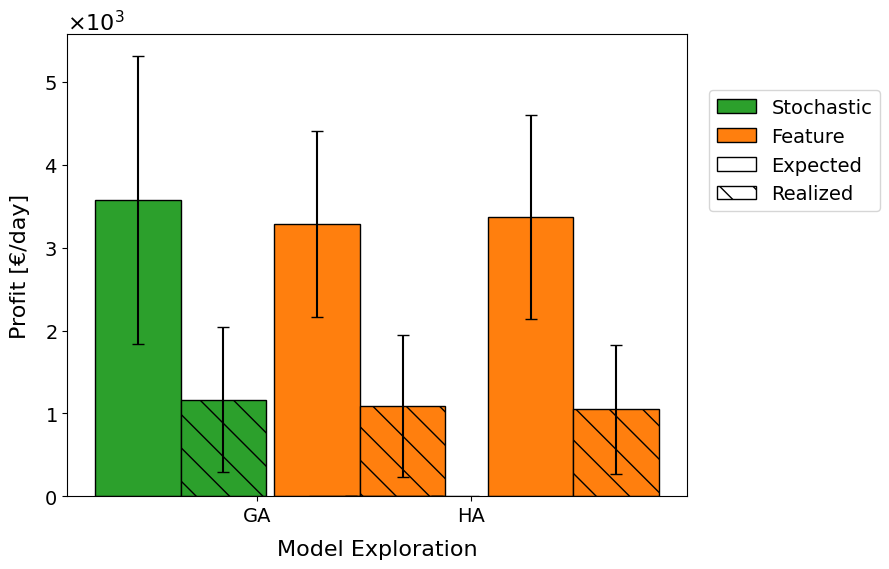

In [8]:
plot_profit_Test(Array, Selected_models = ['Stochastic', 'Feature'], x_axis_label = "Model Exploration", x_axis_selection = [0,1], x_axis_tick_label = ["GA","HA"], Selected_Profit = ['Expected', 'Realized'], barwidth = 0.4,  ShowEachTestDay = False,save=True)